<a href="https://colab.research.google.com/github/sonalisanjeevprabu18/Neural-Network-and-Deep-Learning/blob/main/MNIST_2digit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Training model...
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.7824 - loss: 0.8698
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9053 - loss: 0.3184
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9159 - loss: 0.2902
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9274 - loss: 0.2582
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9349 - loss: 0.2318

-----------------------------
Image Index: 1875
Actual Label: 7
Predicted Label: 7


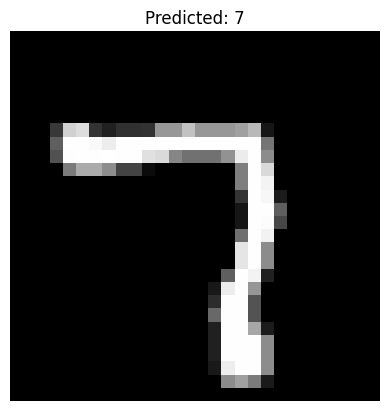


-----------------------------
Image Index: 8414
Actual Label: 0
Predicted Label: 0


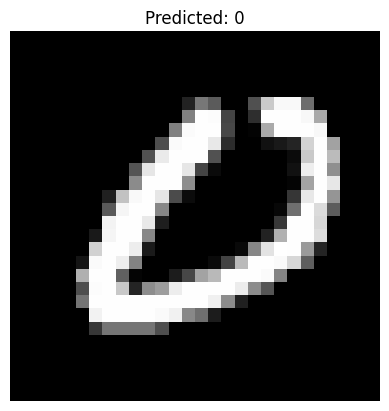

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
# 1. LOAD MNIST DATA
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize images (0–255 → 0–1)
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

# Convert labels to one-hot (needed for categorical_crossentropy)
y_train_oh = tf.keras.utils.to_categorical(y_train, 10)
y_test_oh = tf.keras.utils.to_categorical(y_test, 10)

# 2. BUILD MODEL
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

# 3. COMPILE MODEL with updated optimizer and loss
model.compile(
    optimizer='sgd',                           # changed optimizer
    loss='categorical_crossentropy',           # changed loss
    metrics=['accuracy']
)

# 4. TRAIN MODEL (epochs increased to 5)
print("Training model...")
model.fit(x_train, y_train_oh, epochs=5, verbose=1)

# 5. PICK 2 RANDOM TEST IMAGES
indices = random.sample(range(len(x_test)), 2)

for idx in indices:
    img = x_test[idx]
    label = y_test[idx]
    # Prepare for prediction
    input_img = img.reshape(1, 28, 28, 1)
    # Predict
    prediction = np.argmax(model.predict(input_img, verbose=0))
    # Print results
    print("\n-----------------------------")
    print("Image Index:", idx)
    print("Actual Label:", label)
    print("Predicted Label:", prediction)
    # Show image
    plt.imshow(img.reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {prediction}")
    plt.axis('off')
    plt.show()
